In [42]:
from sklearn import tree
import pandas as pd

training = pd.read_csv("../../../../../res/churndata/training.csv")
test = pd.read_csv("../../../../../res/churndata/test.csv")
unseen = pd.read_csv("../../../../../res/churndata/unseen.csv")

print("\n======================== TESTING ========================\n")
print(test.head(1))
print("\n======================== TRAINING ========================\n")
print(training.head(1))


======================== TESTING ========================

   Account Length  Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  \
0              50           0           1             22     252.9        112   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       42.99     177.9         99       15.12       158.4          146   

   Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn?  
0          7.13        8.5           4          2.3               3       0  

======================== TRAINING ========================

   Account Length  Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  \
0              63           0           0              0     278.0        102   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       47.26     266.4        114       22.64       224.1          118   

   Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn?  
0         10.08  

In [43]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4,min_samples_leaf=4)
clf = clf.fit(training.drop(["Churn?"],axis=1), training["Churn?"])

In [44]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [45]:
test

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,50,0,1,22,252.9,112,42.99,177.9,99,15.12,158.4,146,7.13,8.5,4,2.30,3,0
1,167,0,0,0,207.6,88,35.29,132.4,63,11.25,255.2,98,11.48,14.1,5,3.81,0,0
2,157,1,0,0,180.4,123,30.67,194.0,98,16.49,227.3,88,10.23,8.4,5,2.27,0,0
3,106,0,0,0,223.0,121,37.91,110.1,98,9.36,188.7,107,8.49,7.1,12,1.92,0,0
4,155,0,0,0,262.4,55,44.61,194.6,113,16.54,146.5,85,6.59,8.3,6,2.24,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,112,0,0,0,194.4,101,33.05,190.3,82,16.18,183.4,107,8.25,11.4,2,3.08,0,0
662,144,1,0,0,150.0,69,25.50,285.9,73,24.30,190.6,121,8.58,9.4,15,2.54,0,0
663,125,0,0,0,229.3,103,38.98,177.4,126,15.08,189.3,95,8.52,12.0,8,3.24,1,0
664,180,0,0,0,224.9,105,38.23,250.0,101,21.25,216.1,73,9.72,6.7,5,1.81,3,1


In [46]:
predictions = clf.predict(test.drop(["Churn?"],axis=1))
predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [47]:
pred_probability = clf.predict_proba(test.drop(["Churn?"],axis=1))
pred_probability

array([[0.96907216, 0.03092784],
       [0.97640306, 0.02359694],
       [0.79831933, 0.20168067],
       ...,
       [0.73113208, 0.26886792],
       [0.26530612, 0.73469388],
       [0.97640306, 0.02359694]])

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(test["Churn?"], predictions)

0.9159159159159159

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test["Churn?"], predictions)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test["Churn?"], predictions, labels=[0,1])

array([[556,  11],
       [ 45,  54]], dtype=int64)

In [54]:
from sklearn.metrics import recall_score
recall_score(test["Churn?"], predictions)

0.5454545454545454

<AxesSubplot:>

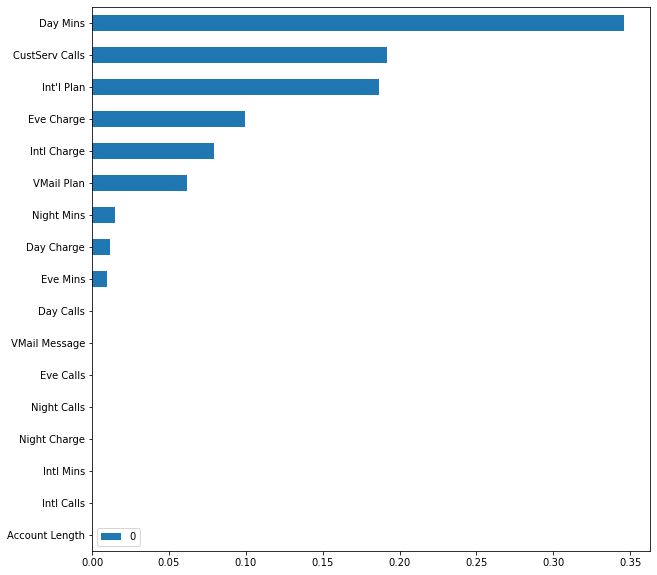

In [51]:
feature_names = training.columns

feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names[:17]).sort_values(by=0)
feature_importance.plot(kind="barh", figsize=(10,10))

In [52]:
train_score = clf.score(training.drop(["Churn?"],axis=1), training["Churn?"])
test_score = clf.score(test.drop(["Churn?"],axis=1), test["Churn?"])
unseen_score = clf.score(unseen.drop(["Churn?"],axis=1), unseen["Churn?"])

print("Training Score:", train_score)
print("Test Score:", test_score)
print("Unseen Score:", unseen_score)

Training Score: 0.9232747535362195
Test Score: 0.9159159159159159
Unseen Score: 0.8982035928143712


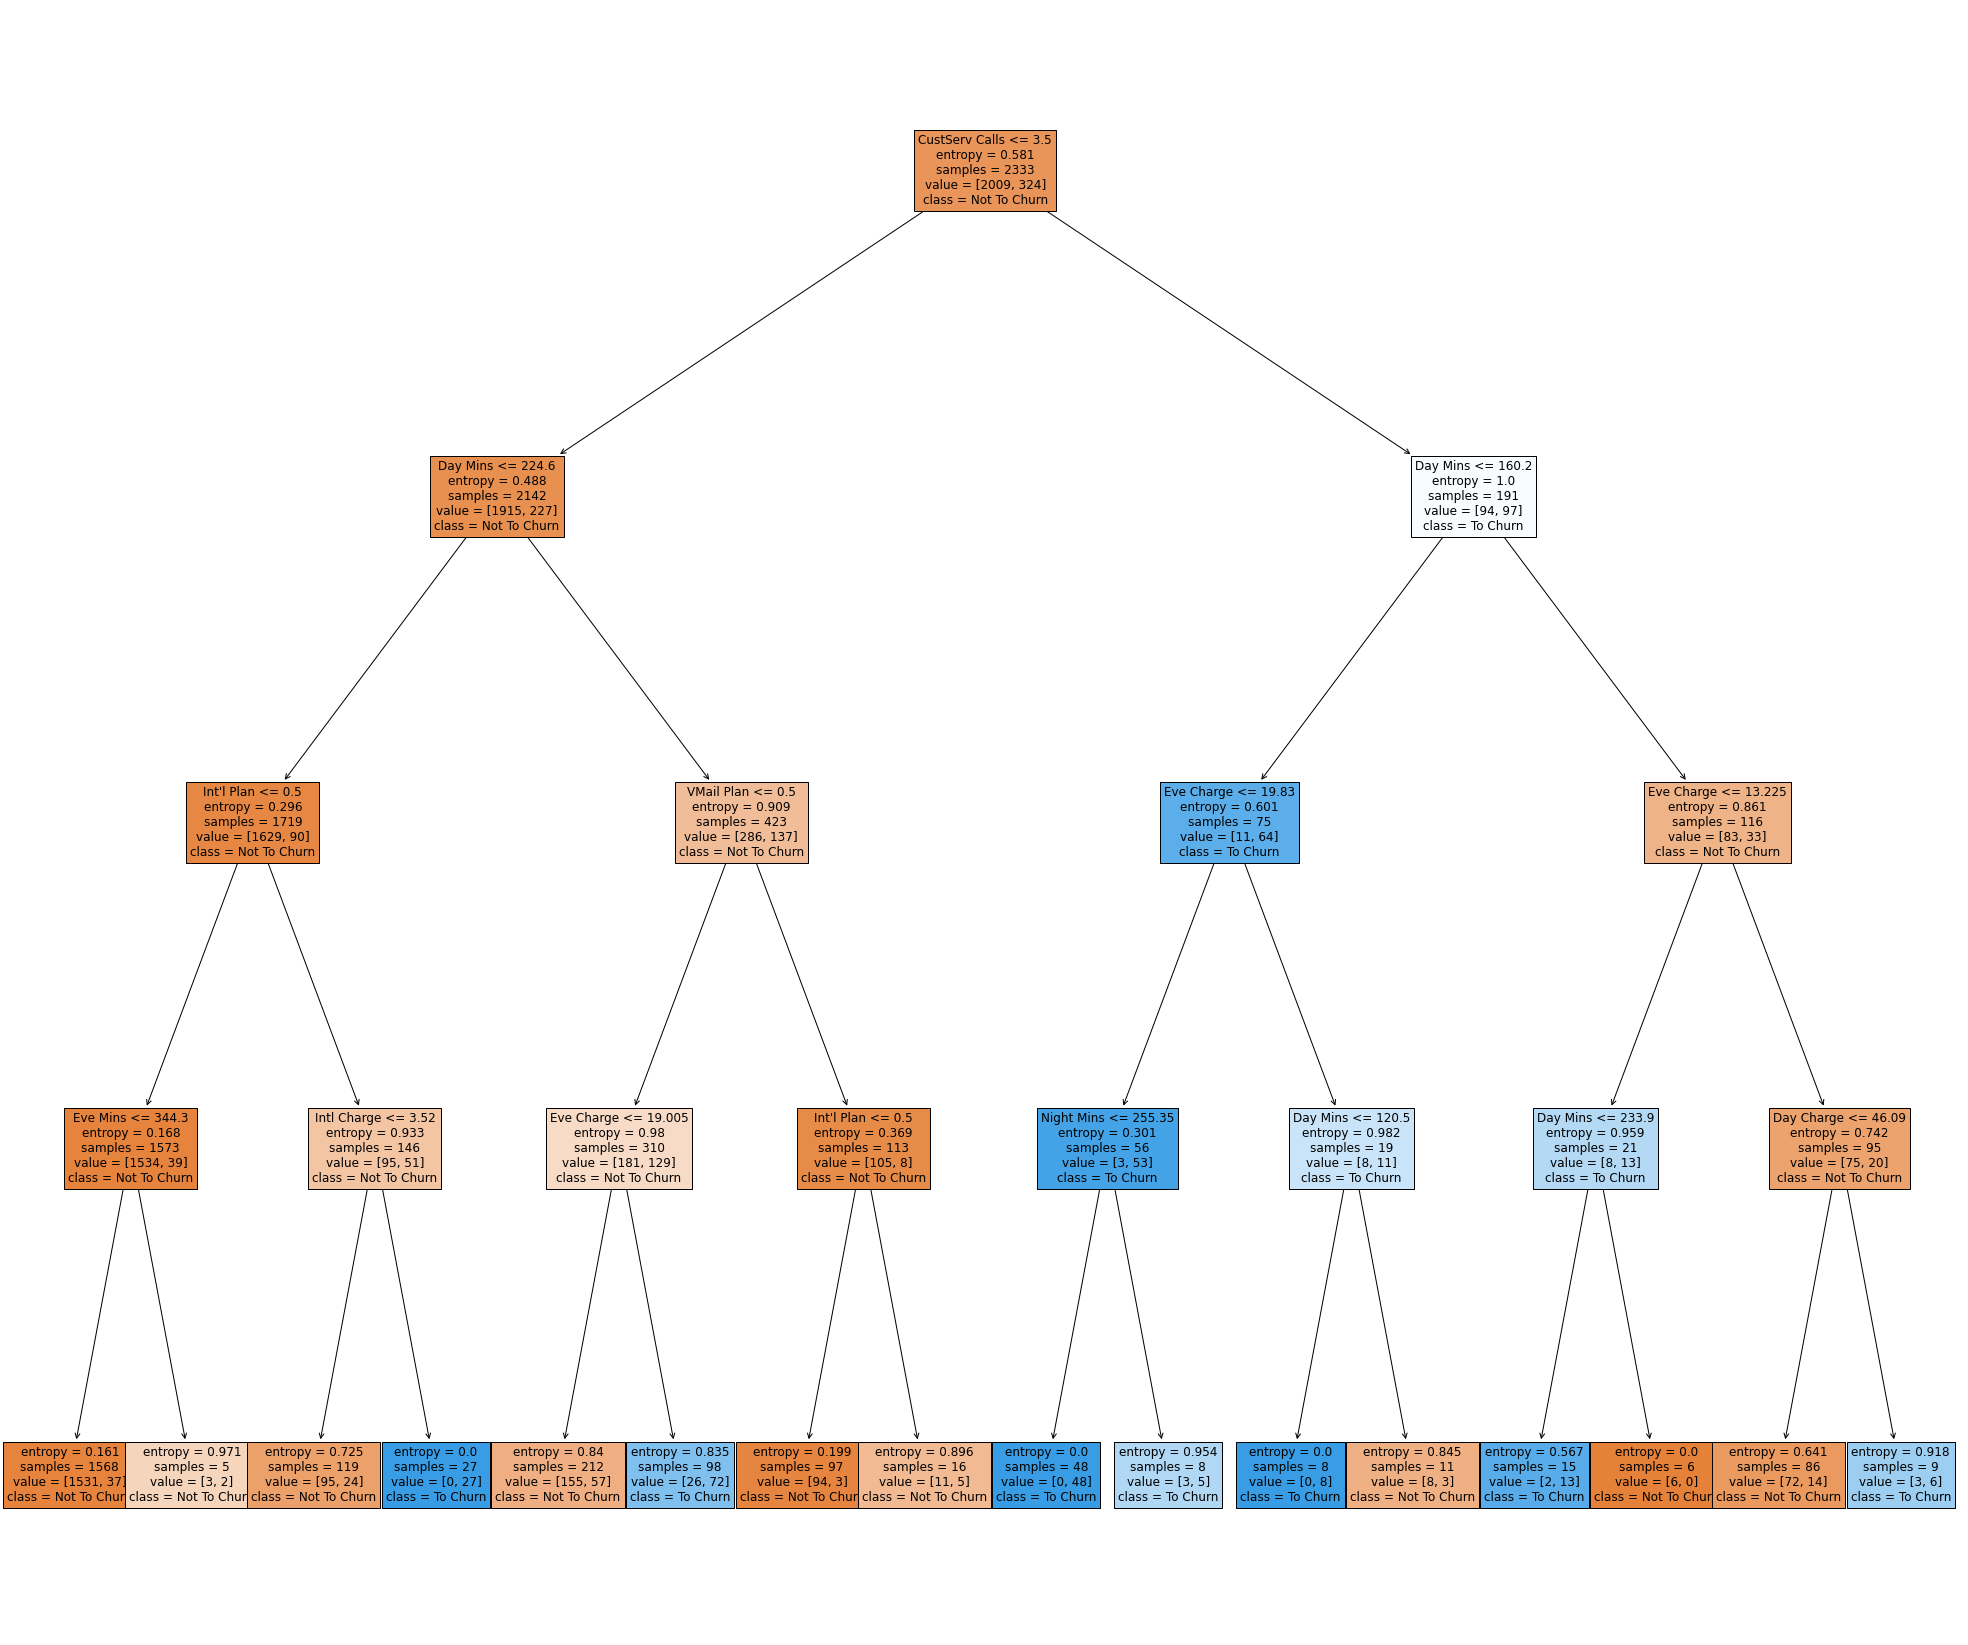

In [53]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(35,30))
_ = tree.plot_tree(
    clf,
    feature_names=feature_names,
    class_names={0:"Not To Churn", 1: "To Churn"},
    filled=True,
    fontsize=12
)